## Wydobywanie elementów ze zdjęcia - pszczółka 🐝 i przestrzeń barw HSV

Dotychczas poruszaliśmy się wjedynie w przestrzeni barw RGB lub w skali szarości. W tym zadaniu zobaczymy jak można wykorzystać przestrzeń barw HSV do wydobycia interesujących nas elementów ze zdjęcia.

Zadanie polega na dobraniu takiego zakresu barw, aby wyizolować pszczółkę ze zdjęcia.

Wykorzystaj do tego obraz w przestrzeni barw HSV, oraz metody:
- `cv2.inRange()`
- `cv2.bitwise_and()`
- `skimage.measure.label()`
- `skimage.measure.regionprops()`

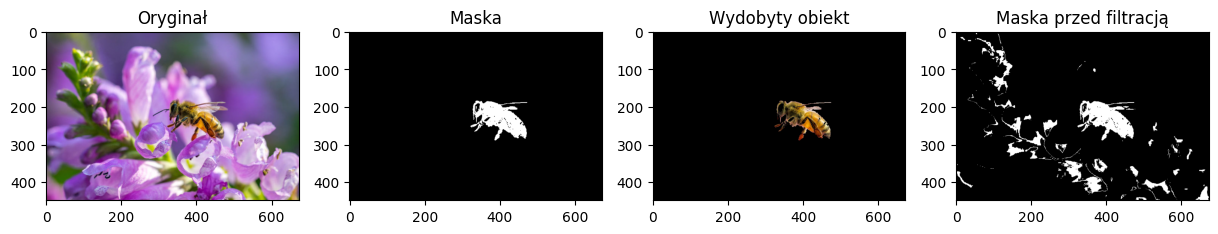

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

img = cv2.imread('pszczola.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def extract_max_object(img_rgb: np.ndarray, h_lower: int, h_upper: int) -> np.ndarray:
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    h = hsv[:, :, 0]
    
    low = np.array([h_lower,0,0]) 
    high = np.array([h_upper, 255, 255])
    raw_mask = cv2.inRange(hsv,low,high)

    labels = measure.label(raw_mask, connectivity=2)
    properties = measure.regionprops(labels)
 
    largest_area = max(properties, key=lambda prop: prop.area)
    mask = (labels == largest_area.label).astype(np.uint8) * 255
    
    hsv = cv2.bitwise_and(hsv, hsv, mask=mask)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    return rgb, mask, raw_mask

masked, mask, raw_mask = extract_max_object(img, 0, 30)

plt.subplots(1, 4, figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Oryginał')

plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Maska')

plt.subplot(1, 4, 3)
plt.imshow(masked)
plt.title('Wydobyty obiekt')

plt.subplot(1, 4, 4)
plt.imshow(raw_mask, cmap='gray')
plt.title('Maska przed filtracją')


plt.show()
